# Errors Numerical Stability And Well Posed Problems

### Install library

https://anaconda.org/conda-forge/r-cubature

`conda install -c conda-forge r-cubature`

### Load library

In [1]:
library(cubature)
library(ggplot2)

options(repr.plot.width = 6, repr.plot.height = 4)

## Round off error 
http://mathforcollege.com/nm/mws/gen/01aae/mws_gen_aae_spe_measuringerror.pdf

In [2]:
a <- pi

a

[1] 3.141593

In [3]:
b <- 3.142

b

[1] 3.142

In [4]:
error <- a - b 

error

[1] -0.0004073464

## Truncation error or discretization errors

### Take numbers between `-1` to `7`

In [5]:
x <- seq(-1, 7, .5)

x

[1] -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0
[16]  6.5  7.0

### Function is `f(x) = 4x^2`

In [6]:
f_x <- expression(4*x^2)

f_x

expression(4 * x^2)

In [7]:
y <- eval(f_x)

y

[1]   4   1   0   1   4   9  16  25  36  49  64  81 100 121 144 169 196

In [8]:
data_points <- data.frame(x, y)

data_points

x,y
-1.0,4
-0.5,1
0.0,0
0.5,1
1.0,4
1.5,9
2.0,16
2.5,25
3.0,36
3.5,49


### Create a function which return function variable

In [9]:
poly_fun <- function(x){
    return (4 * x^2)
}

### Graphically representation of ploynomial function

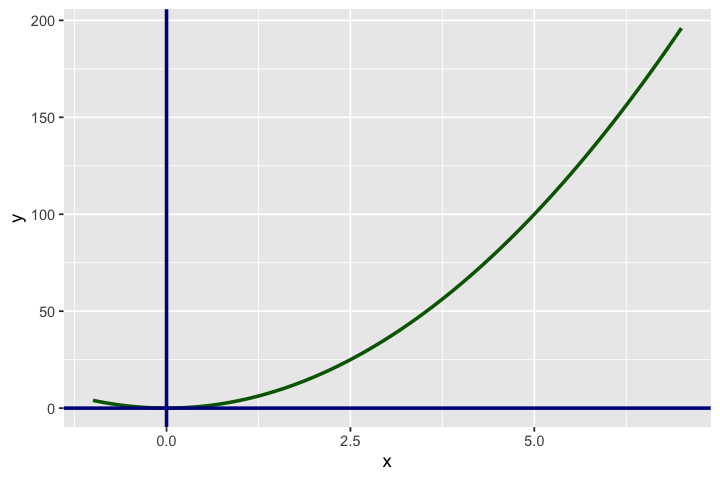

In [10]:
ggplot(data_points, aes(x = x, y = y)) + 
    stat_function(fun = poly_fun, col = 'darkgreen', size = 1, alpha = 1)+
    geom_hline(aes(yintercept = 0), size = 1, col = 'darkblue')+
    geom_vline(aes(xintercept = 0), size = 1, col = 'darkblue') 

### Taken two point on the given curve of function 
Note:- where x1 = 3, y1 = 5 and x2 = 36, y2 = 100

In [11]:
x <- c(3, 5)
y <- c(36, 100)

In [12]:
two_points <- data.frame(x, y)
two_points

x,y
3,36
5,100


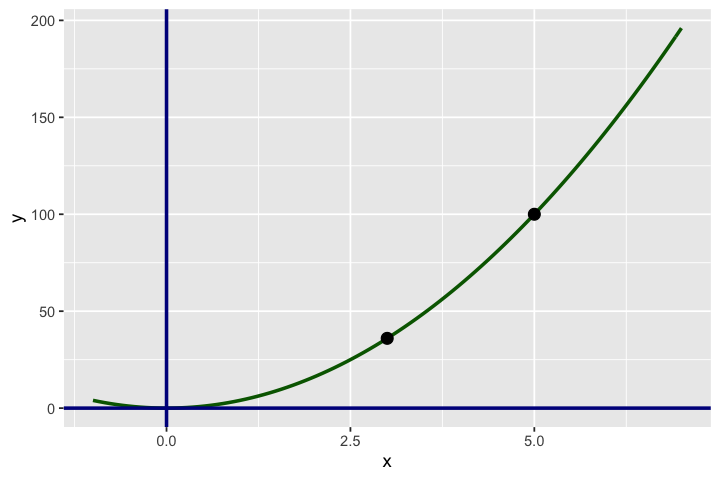

In [13]:
ggplot(data_points, aes(x = x, y = y)) + 
    stat_function(fun = poly_fun, col = 'darkgreen', size = 1, alpha = 1)+
    geom_hline(aes(yintercept = 0), size = 1, col = 'darkblue')+
    geom_vline(aes(xintercept = 0), size = 1, col = 'darkblue') +
    geom_point(col = 'black', data = two_points, size = 3)

### Graw a secant line between two taken points

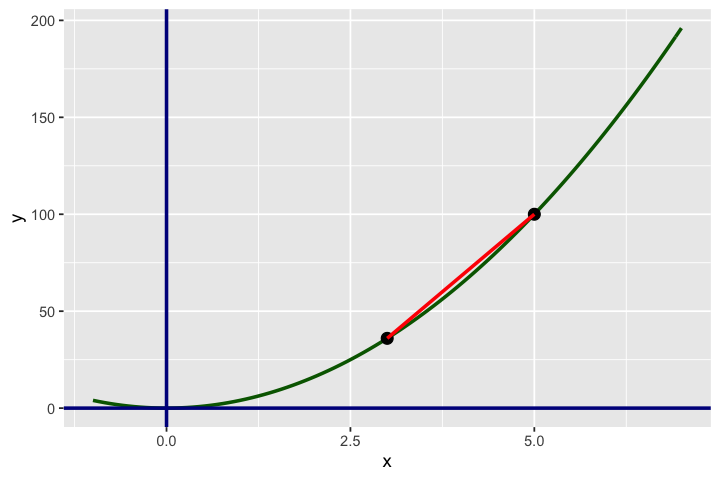

In [14]:
ggplot(data_points, aes(x = x, y = y)) + 
    stat_function(fun = poly_fun, col = 'darkgreen', size = 1, alpha = 1)+
    geom_hline(aes(yintercept = 0), size = 1, col = 'darkblue')+
    geom_vline(aes(xintercept = 0), size = 1, col = 'darkblue') +
    geom_point(col = 'black', data = two_points, size = 3)+
    geom_line(col = 'red', data = two_points, size = 1)

### Approximation Errors

__Note:- In the above case, we took large values of h, so we can see clearly but in real life problem h value will be close to zero i.e (h -> 0) or h value will tends to zero but not exacly zero.

The line here is an approximation of the original curve, closer together the points, better the approximation.__

https://en.wikipedia.org/wiki/Approximation_error

## Case-I

### Set value of x = 3 and h = 0.1

In [15]:
x <- 3
h <- .1

### Create a function or expression i.e `f(x)`

In [16]:
f_x <- expression(4*x^2)

f_x

expression(4 * x^2)

### Create a function of  `f(x+h)`

In [17]:
f_x_h <- expression(4 * (x + h)^2)

f_x_h

expression(4 * (x + h)^2)

### Find derivative by using analytics method of function i.e  `f'(x)` 

In [18]:
dx <- D(f_x, 'x')

dx

4 * (2 * x)

### Find true value of derivative of function i.e `f'(x)`.  

In [19]:
true_value <- eval(dx)

true_value

[1] 24

### Finda approximate values of drivative of function by using `numerical method` i.e h. or find value of  `f'(x+h)`
http://mathforcollege.com/nm/mws/gen/01aae/mws_gen_aae_spe_sourcesoferror.pdf

In [20]:
approx_value <- (eval(f_x_h) - eval(f_x)) / h

approx_value

[1] 24.4

### Find error 

In [21]:
true_error_value <- true_value - approx_value

true_error_value

[1] -0.4

### Ralative true error 

In [22]:
rel_true_error <- true_error_value / true_value

rel_true_error

[1] -0.01666667

### case-II

In [23]:
x <- 3
h <- .0001

### Find true value of derivative of function i.e `f'(x)`.  

In [27]:
true_value <- eval(dx)

true_value

[1] 24

### Finda approximate values of drivative of function by using `numerical method` i.e h. or find value of  `f'(x+h)`
http://mathforcollege.com/nm/mws/gen/01aae/mws_gen_aae_spe_sourcesoferror.pdf

In [28]:
approx_value <- (eval(f_x_h) - eval(f_x)) / h

approx_value

[1] 24.0004

### Find error 

In [29]:
true_error_value <- true_value - approx_value

true_error_value

[1] -4e-04

### Relative true error 

In [30]:
rel_true_error <- true_error_value / true_value

rel_true_error

[1] -1.666667e-05

## NumericalStability

__In numerical algorithms for differential equations the concern is the growth of round-off errors and/or initially small fluctuations in initial data which might cause a large deviation of final answer from the exact solution.__ 

__Note:-__
In short, if a actual solution or equation has less error in Eular equation is called error as a numerical stability if large or can't approximatable is called error as a numerical non-stability. 

https://en.wikipedia.org/wiki/Numerical_stability#Stability_in_numerical_differential_equations

https://en.wikipedia.org/wiki/Euler_method#Example

https://en.wikipedia.org/wiki/Euler_method#Derivation

https://en.wikipedia.org/wiki/Euler_method#Numerical_stability

### Find solution by analytics method

Given,
`y' = y` and `y(0) = 1`

Since,
y' = y

=> dy/dt = y

=> dy/y = dt

Intergrate both side

=> ln(y) = t + c

here, c is a constant.

=> y = e^(t + c) .......(i)

since,
y(0) = 1

therefore,
At, t = 0.


1 = e^(0 + c)

=> ln(1) = 0 + c

=> 0 = 0 + c

therefore, 
c = 0

from  .....(i)

and hence,
y = e^t

### Find solution by numerical method

https://en.wikipedia.org/wiki/Euler_method#Example

The Euler method is

 y_n+1 = y_n + h*  f (t_n, y_n)

### Create a first order differential equation.

In [31]:
y_dash <- function(t_i, y) {
    y
}

y_dash

function(t_i, y) {
    y
}

### Initialize parameters

In [32]:
t_0 <- 0 
t_n <- 6
h <- 1
y_0 <- 1

### Find approximate solution or eular equation from actual derivative points 

In [33]:
euler_method <- function(t_0, h, t_n, y_0, y_dash){
    t_seq <- seq(t_0, t_n, by = h)

    data_frame <- data.frame(t_i = t_seq)
    
    data_frame$h <- h
    data_frame$y_i <- y_0
    
    data_frame$f_dash[1] <- y_dash(data_frame$t_i[1], y_0)
    
    for (i in 2:nrow(data_frame)) {

        data_frame$y_i[i] <- data_frame$y_i[i - 1] +  h * data_frame$f_dash[i - 1]
        
        data_frame$f_dash[i] <- y_dash(data_frame$t_i[i], data_frame$y_i[i])
        
    }
    return (data_frame)
}

In [35]:
table <- euler_method(t_0, h, t_n, y_0, y_dash)

table

t_i,h,y_i,f_dash
0,1,1,1
1,1,2,2
2,1,4,4
3,1,8,8
4,1,16,16
5,1,32,32
6,1,64,64


### Rename columns name

In [36]:
colnames(table) <- c('t.i', 'h', 'y.i', 'Dy/dt')

table

t.i,h,y.i,Dy/dt
0,1,1,1
1,1,2,2
2,1,4,4
3,1,8,8
4,1,16,16
5,1,32,32
6,1,64,64


### Find exact solution or real equation after putting `t.i` values into `exponential` function  and store into data frame.
__Note:-__ we put `t.i` values into `e` iff the values of `y.i` look like as `e^t`, so for eular equation we put as `e^t`. And hence `y = e^t`

In [37]:
table$y <- exp(table$t.i)

table

t.i,h,y.i,Dy/dt,y
0,1,1,1,1.000000
1,1,2,2,2.718282
2,1,4,4,7.389056
3,1,8,8,20.085537
4,1,16,16,54.598150
5,1,32,32,148.413159
6,1,64,64,403.428793


### Graphical representation of `Euler` equation and `Exact` solution.

In [38]:
options(repr.plot.width = 6, repr.plot.height = 5)

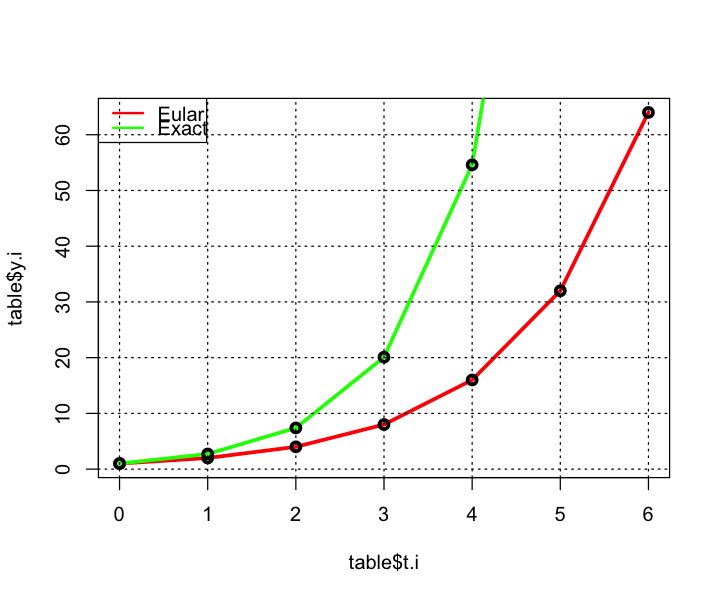

In [39]:
plot(table$t.i, table$y.i, col = 'red', type = 'l', lwd = 3)
points(table$t.i, table$y.i, col ='black', lwd = 3)

lines(table$t.i, table$y, col ='green', lwd = 3)
points(table$t.i, table$y, col ='black', lwd = 3)

grid(col = 'black')
legend('topleft', legend = c('Eular', 'Exact'), lwd = 2, col = c('red', 'green'))

__Note:-__ Error between `Euler` and `Exact` is large and it grows so this is not numerically stable

In [40]:
table$error <- table$y.i - table$y 
table

t.i,h,y.i,Dy/dt,y,error
0,1,1,1,1.000000,0.0000000
1,1,2,2,2.718282,-0.7182818
2,1,4,4,7.389056,-3.3890561
3,1,8,8,20.085537,-12.0855369
4,1,16,16,54.598150,-38.5981500
5,1,32,32,148.413159,-116.4131591
6,1,64,64,403.428793,-339.4287935


In [41]:
t_0 <- 0 
t_n <- 6
h <- 0.03
y_0 <- 1

In [42]:
table <- euler_method(t_0, h, t_n, y_0, y_dash)

head(table)

t_i,h,y_i,f_dash
0.00,0.03,1.000000,1.000000
0.03,0.03,1.030000,1.030000
0.06,0.03,1.060900,1.060900
0.09,0.03,1.092727,1.092727
0.12,0.03,1.125509,1.125509
0.15,0.03,1.159274,1.159274


In [44]:
colnames(table) <- c('t.i', 'h', 'y.i', 'Dy/dt')

table$y <- exp(table$t.i)

head(table)

t.i,h,y.i,Dy/dt,NA,y
0.00,0.03,1.000000,1.000000,1.000000,1.000000
0.03,0.03,1.030000,1.030000,1.030455,1.030455
0.06,0.03,1.060900,1.060900,1.061837,1.061837
0.09,0.03,1.092727,1.092727,1.094174,1.094174
0.12,0.03,1.125509,1.125509,1.127497,1.127497
0.15,0.03,1.159274,1.159274,1.161834,1.161834


## Graphical representation of `Euler` equation and `Exact` solution.

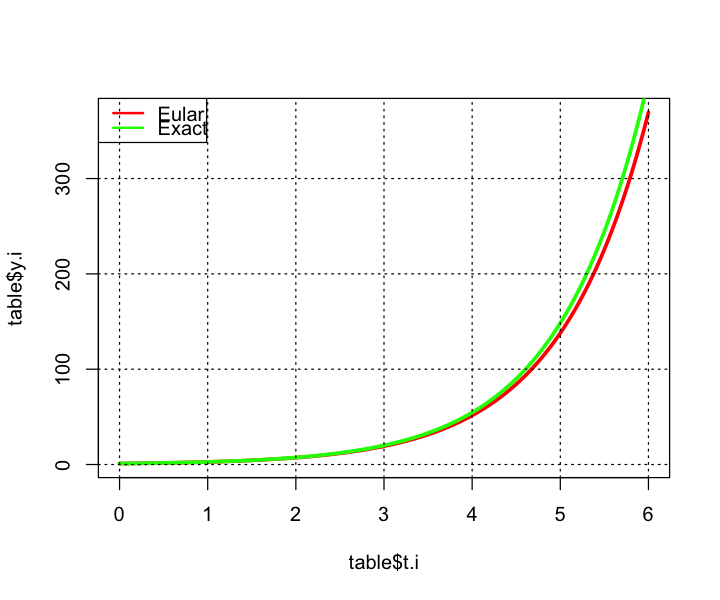

In [45]:
plot(table$t.i, table$y.i, col = 'red', type = 'l', lwd = 3)
lines(table$t.i, table$y, col ='green', lwd = 3)
grid(col = 'black')
legend('topleft', legend = c('Eular', 'Exact'), lwd = 2, col = c('red', 'green'))

In [46]:
table$error <- table$y.i - table$y

head(table)

t.i,h,y.i,Dy/dt,NA,y,error
0.00,0.03,1.000000,1.000000,1.000000,1.000000,0.0000000000
0.03,0.03,1.030000,1.030000,1.030455,1.030455,-0.0004545340
0.06,0.03,1.060900,1.060900,1.061837,1.061837,-0.0009365465
0.09,0.03,1.092727,1.092727,1.094174,1.094174,-0.0014472837
0.12,0.03,1.125509,1.125509,1.127497,1.127497,-0.0019880416
0.15,0.03,1.159274,1.159274,1.161834,1.161834,-0.0025601684


### Numerical stability for `y' = k.y` where `k` is constant and `y(0) = 1`.

### Find solution by analytics method

Given,
`y' = -2.3y` and `y(0) = 1`

Since,
y' = -2.3y

=> dy/dt = -2.3y

=> dy/y = -2.3dt

Intergrate both side

=> ln(y) = -2.3 * t + c

here, c is a constant.

=> y = e^(-2.3 * t + c) .......(i)

since,
y(0) = 1

therefore,
At, t = 0.

1 = e^(-2.3 * 0 + c)

=> ln(1) = 0 + c

=> 0 = 0 + c

therefore, 
c = 0

from ....(i)

and hence,
y = e^-2.3 * t

### Find solution by numerical method

### Create a first order differential equation.

In [47]:
y_dash <- function(t_i, y)  {
    -2.3 * y
}

y_dash

function(t_i, y)  {
    -2.3 * y
}

### Initialize parameters

In [48]:
t_0 <- 0 
t_n <- 6
h <- 1
y_0 <- 1

In [49]:
table <- euler_method(t_0, h, t_n, y_0, y_dash)

head(table)

t_i,h,y_i,f_dash
0,1,1.00000,-2.300000
1,1,-1.30000,2.990000
2,1,1.69000,-3.887000
3,1,-2.19700,5.053100
4,1,2.85610,-6.569030
5,1,-3.71293,8.539739


In [50]:
colnames(table) <- c('t.i', 'h', 'y.i', 'Dy/dt')

table$y <- exp(-2.3 * table$t.i)

head(table)

t.i,h,y.i,Dy/dt,y
0,1,1.00000,-2.300000,1.000000e+00
1,1,-1.30000,2.990000,1.002588e-01
2,1,1.69000,-3.887000,1.005184e-02
3,1,-2.19700,5.053100,1.007785e-03
4,1,2.85610,-6.569030,1.010394e-04
5,1,-3.71293,8.539739,1.013009e-05


### Graphical representation of `Euler` equation and `Exact` or actual solution.

https://en.wikipedia.org/wiki/Euler_method#Numerical_stability

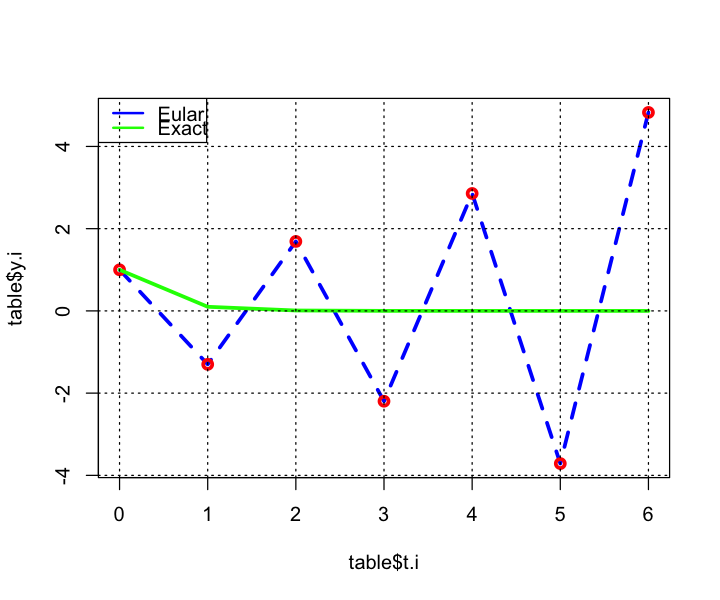

In [51]:
plot(table$t.i, table$y.i, col = 'blue', type = 'l', lty=2, lwd = 3)
points(table$t.i, table$y.i, col = 'red', lwd = 3)

lines(table$t.i, table$y, col ='green', lwd = 3)
grid(col = 'black')
legend('topleft', legend = c('Eular', 'Exact'), lwd = 2, col = c('blue', 'green'))

### Check how `Eular` and `Exact` solution are diferrence or check error of stabilty or not?

__Note:-__ Error between `Eular` and `Exact` are not small so it's called error of non numerical stability because of only we have little big size of `h`.

In [52]:
table$error <- table$y.i - table$y

head(table)

t.i,h,y.i,Dy/dt,y,error
0,1,1.00000,-2.300000,1.000000e+00,0.000000
1,1,-1.30000,2.990000,1.002588e-01,-1.400259
2,1,1.69000,-3.887000,1.005184e-02,1.679948
3,1,-2.19700,5.053100,1.007785e-03,-2.198008
4,1,2.85610,-6.569030,1.010394e-04,2.855999
5,1,-3.71293,8.539739,1.013009e-05,-3.712940


In [53]:
t_0 <- 0 
t_n <- 6
h <- .6
y_0 <- 1

In [54]:
table <- euler_method(t_0, h, t_n, y_0, y_dash)

colnames(table) <- c('t.i', 'h', 'y.i', 'Dy/dt')

table$y <- exp(-2.3 * table$t.i)

head(table)

t.i,h,y.i,Dy/dt,y
0.0,0.6,1.000000000,-2.30000000,1.000000000
0.6,0.6,-0.380000000,0.87400000,0.251578553
1.2,0.6,0.144400000,-0.33212000,0.063291768
1.8,0.6,-0.054872000,0.12620560,0.015922852
2.4,0.6,0.020851360,-0.04795813,0.004005848
3.0,0.6,-0.007923517,0.01822409,0.001007785


### Graphical representation of `Euler` equation and `Exact` or actual solution.

https://en.wikipedia.org/wiki/Euler_method#Numerical_stability

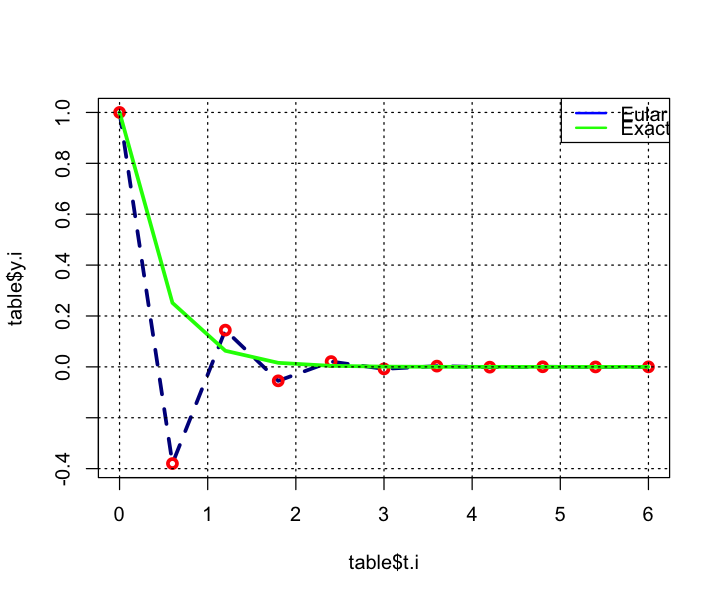

In [55]:
plot(table$t.i, table$y.i, col = 'darkblue', type = 'l', lty=2, lwd = 3)
points(table$t.i, table$y.i, col = 'red', lwd = 3)

lines(table$t.i, table$y, col ='green', lwd = 3)
grid(col = 'black')
legend('topright', legend = c('Eular', 'Exact'), lwd = 2, col = c('blue', 'green'))

In [56]:
table$error <- table$y.i - table$y 

head(table)

t.i,h,y.i,Dy/dt,y,error
0.0,0.6,1.000000000,-2.30000000,1.000000000,0.000000000
0.6,0.6,-0.380000000,0.87400000,0.251578553,-0.631578553
1.2,0.6,0.144400000,-0.33212000,0.063291768,0.081108232
1.8,0.6,-0.054872000,0.12620560,0.015922852,-0.070794852
2.4,0.6,0.020851360,-0.04795813,0.004005848,0.016845512
3.0,0.6,-0.007923517,0.01822409,0.001007785,-0.008931302
